In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import torch.nn as nn
import torch.nn.functional as Fun 


In [2]:
dt = load_iris()
data = pd.DataFrame(dt.data, columns = dt.feature_names)
data['target'] = dt.target 

In [3]:
data 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
x = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values 

In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
class Model(nn.Module):
    def __init__(self, input_features=4, H1=8, H2=8, output_classes=3):
        super(Model, self).__init__()

        self.fc1 = nn.Linear(input_features, H1)
        self.fc2 = nn.Linear(H1, H2)
        self.out = nn.Linear(H2, output_classes)

    def forward(self, x):
        x = Fun.relu(self.fc1(x))
        x = Fun.relu(self.fc2(x))
        x = self.out(x)
        return x

In [8]:
import torch 
torch.manual_seed(42)
model =  Model()

In [9]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)


In [21]:
x_train = torch.FloatTensor(x_train)
x_test  = torch.FloatTensor(x_test)

In [23]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [24]:
y_

tensor([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0,
        2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1,
        0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0,
        0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
        2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [13]:
metrics = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [32]:

epochs = 100
losses  = []
for i in range(epochs):

    y_pred = model(x_train)
    loss = metrics(y_pred, y_train)
    losses.append(loss.item())

    predicted = torch.argmax(y_pred, dim=1)
    train_acc = (predicted == y_train).float().mean()

    if i % 10 == 0:
        model.eval()
        with torch.no_grad():
            test_pred = model(x_test)
            test_acc = (torch.argmax(test_pred, dim=1) == y_test).float().mean()
        model.train()

        print(f"Epoch {i} | Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 


Epoch 0 | Loss: 0.0478 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 10 | Loss: 0.0456 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 20 | Loss: 0.0441 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 30 | Loss: 0.0429 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 40 | Loss: 0.0423 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 50 | Loss: 0.0419 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 60 | Loss: 0.0415 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 70 | Loss: 0.0413 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 80 | Loss: 0.0411 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 90 | Loss: 0.0410 | Train Acc: 0.9833 | Test Acc: 1.0000


Epoch 0 | Loss: 1.1193 | Train Acc: 0.3250 | Test Acc: 0.3667
Epoch 10 | Loss: 0.9993 | Train Acc: 0.3250 | Test Acc: 0.3667
Epoch 20 | Loss: 0.7984 | Train Acc: 0.8083 | Test Acc: 0.8000
Epoch 30 | Loss: 0.5425 | Train Acc: 0.8333 | Test Acc: 0.9333
Epoch 40 | Loss: 0.3221 | Train Acc: 0.8833 | Test Acc: 0.9333
Epoch 50 | Loss: 0.2087 | Train Acc: 0.9250 | Test Acc: 0.9667
Epoch 60 | Loss: 0.1229 | Train Acc: 0.9667 | Test Acc: 0.9667
Epoch 70 | Loss: 0.0709 | Train Acc: 0.9750 | Test Acc: 1.0000
Epoch 80 | Loss: 0.0577 | Train Acc: 0.9750 | Test Acc: 1.0000
Epoch 90 | Loss: 0.0510 | Train Acc: 0.9833 | Test Acc: 1.0000


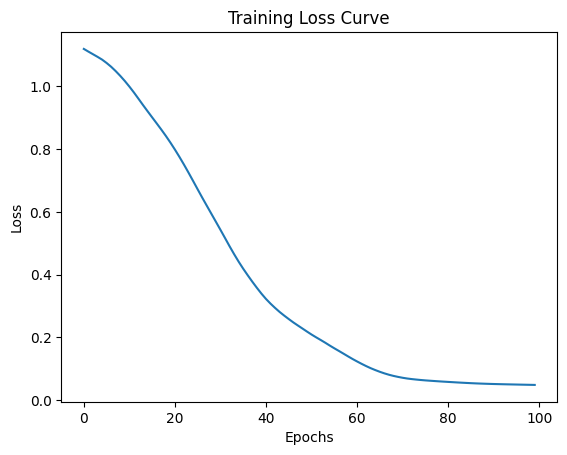

In [34]:
# -------------------------
# 1. IMPORT LIBRARIES
# -------------------------
import torch
import torch.nn as nn
import torch.nn.functional as Fun
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# -------------------------
# 2. LOAD DATA
# -------------------------
dt = load_iris()
data = pd.DataFrame(dt.data, columns=dt.feature_names)
data['target'] = dt.target

x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


# -------------------------
# 3. DEFINE MODEL
# -------------------------
class Model(nn.Module):
    def __init__(self, input_features=4, H1=8, H2=8, output_classes=3):
        super(Model, self).__init__()

        self.fc1 = nn.Linear(input_features, H1)
        self.fc2 = nn.Linear(H1, H2)
        self.out = nn.Linear(H2, output_classes)

    def forward(self, x):
        x = Fun.relu(self.fc1(x))
        x = Fun.relu(self.fc2(x))
        x = self.out(x)
        return x


# -------------------------
# 4. SET RANDOM SEED & CREATE MODEL
# -------------------------
torch.manual_seed(42)
model = Model()


# -------------------------
# 5. PREPROCESS DATA
# -------------------------
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

x_train = torch.FloatTensor(x_train)
x_test  = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test  = torch.LongTensor(y_test)


# -------------------------
# 6. LOSS & OPTIMIZER
# -------------------------
metrics = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


# -------------------------
# 7. TRAINING LOOP
# -------------------------
epochs = 100
losses = []

# for i in range(epochs):

#     # Forward pass
#     y_pred = model(x_train)

#     # Compute loss
#     loss = metrics(y_pred, y_train)
#     losses.append(loss.item())

#     # Print progress
#     if i % 10 == 0:
#         print(f"Epoch {i} | Loss: {loss:.4f}")

#     # Backpropagation
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
for i in range(epochs):

    y_pred = model(x_train)
    loss = metrics(y_pred, y_train)
    losses.append(loss.item())

    predicted = torch.argmax(y_pred, dim=1)
    train_acc = (predicted == y_train).float().mean()

    if i % 10 == 0:
        model.eval()
        with torch.no_grad():
            test_pred = model(x_test)
            test_acc = (torch.argmax(test_pred, dim=1) == y_test).float().mean()
        model.train()

        print(f"Epoch {i} | Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# -------------------------
# 8. PLOT LOSS GRAPH
# -------------------------
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


In [35]:
# if there is no drop down of error(loss) we should update the learning rate(lr) or the epoch size 